The Functional API
===============

https://keras.io/guides/functional_api/

In [1]:
#Setup

try:
    import tensorflow as tf
    from tensorflow import keras
    #from keras.models import Sequential
    from keras import layers
except ImportError as e:
    print(f"Error occurred while importing modules: {e}")

In [2]:
# Start by creating an input node:

try:
    inputs = layers.Input(shape=(784,))
    print("keras.layers.Input is available for use.")
    print(f"Shape of 'inputs': {inputs.shape}")
    print(f"Data type of 'inputs': {inputs.dtype}")
except (NameError, AttributeError):
    print("keras.layers.Input is not available.")

keras.layers.Input is available for use.
Shape of 'inputs': (None, 784)
Data type of 'inputs': <dtype: 'float32'>


In [3]:
# You create a new node in the graph of layers by calling a layer on this inputs object:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [6]:
# To add more layers to the graph of layers:
x = layers.Dense(64, activation='relu')(x)

In [7]:
# Define the output layer
outputs = layers.Dense(10)(x)

In [8]:
# Create the output model
model = keras.Model(inputs=inputs, outputs=outputs, name="test_model")

In [9]:
# Show a summary
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 63,370
Trainable params: 63,370
Non-traina

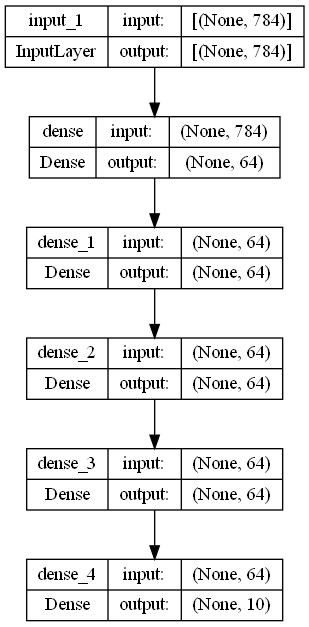

In [10]:
# Display a graphic model

import pydot
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True)

#API overview: a first end-to-end example
===============
When passing data to the built-in training loops of a model, you should either use NumPy arrays (if your data is small and fits in memory) or tf.data.Dataset objects. In the next few paragraphs, we'll use the MNIST dataset as NumPy arrays, in order to demonstrate how to use optimizers, losses, and metrics.

Let's consider the following model (here, we build in with the Functional API, but it could be a Sequential model or a subclassed model as well):

In [11]:
model.summary()

Model: "test_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 63,370
Trainable params: 63,370
Non-traina

Here's what the typical end-to-end workflow looks like, consisting of:

1. Training
2. Validation on a holdout set generated from the original training data
3. Evaluation on the test data

We'll use MNIST data for this example.

https://keras.io/guides/training_with_built_in_methods/

In [12]:
'''
This code loads the MNIST dataset using the load_data() function from keras.datasets.mnist. 
It returns four NumPy arrays: x_train, y_train, x_test, and y_test. 
x_train and x_test contain the images (pixel data) of handwritten digits, 
while y_train and y_test contain the corresponding labels (digits from 0 to 9).
'''

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [13]:
'''
The images in x_train are reshaped from 28x28 matrices to a flat array of 784 elements. 
Each image is transformed into a 1D array of pixel values. 
The astype("float32") converts the pixel values to 32-bit floating-point numbers, 
and then the pixel values are normalized by dividing them by 255. 
Normalizing the pixel values to the range [0, 1] helps in faster convergence of the neural network during training.
The same preprocessing is applied to the test set, x_test, to reshape and normalize the pixel values.
The labels y_train and y_test are converted to 32-bit floating-point numbers.
This conversion is done to ensure consistency in data types during training and evaluation.
'''

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [14]:
# Reserve 10,000 samples for validation

'''
The last 10,000 samples from the training set are separated to create a validation set. 
This validation set will be used during training to monitor the model's performance and prevent overfitting.
'''

x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [16]:
y_val

array([3., 8., 6., ..., 5., 6., 8.], dtype=float32)

In [18]:
'''
The next steps are to perform the compilation and training of a neural 
network model using TensorFlow and Keras for the MNIST dataset.
The method compile configures the model for training. 
It specifies the optimizer, loss function, and evaluation metrics for the model
'''

model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
    
# The RMSprop optimizer is used for updating the model's weights during training
# The Sparse Categorical Crossentropy loss function is used for calculating the model's loss during training
# The Sparse Categorical Accuracy metric is used to monitor the accuracy of the model during training

)

The <b>optimizer</b> is responsible for updating the model's weights and biases (also known as model's parameters) 
iteratively during training process to minimize the loss function. 
The optimization process involves finding the optimal set of model parameters
that results in the smallest possible value of the loss function. 
This optimization is often performed through an iterative process known as gradient descent or its variants.
During each iteration of the training process, the optimizer calculates the gradients of the loss function with respect 
to the model's parameters. These gradients indicate the direction and magnitude of the steepest increase in the loss function.
The optimizer then uses these gradients to update the model's parameters in the opposite direction to reduce the loss. 
The magnitude of the update is controlled by a learning rate, which determines how much the model's 
parameters should change at each step.
The optimization process continues for multiple epochs, during which the optimizer repeatedly updates the model's parameters, 
gradually improving its performance on the training data.
The choice of optimizer can significantly impact the convergence speed and the quality of the model's final results. 
Some popular optimizers include Stochastic Gradient Descent (SGD), Adam, RMSprop, and others

The <b>loss function</b>, also known as a cost function or objective function, is used to measure 
how well a model is performing on a given task or problem. 
It quantifies the difference between the predicted output of the model and the true target values in the training data. 
The choice of the loss function depends on the task type, such as classification or regression. 
Selecting an appropriate loss function is essential, as it guides the model to learn meaningful representations from the data.
For example, in classification tasks, the cross-entropy loss (binary or categorical) is commonly used, 
while mean squared error (MSE) loss is used for regression tasks.
The ultimate objective is to find a set of model parameters that result in the smallest possible loss, 
indicating the model's best performance on the task at hand.

<b>Evaluation metrics</b> are used to measure the model's performance during and after training. 
These metrics are useful for assessing how well the model is performing on tasks such as 
classification or regression on the validation or test set. 
Common evaluation metrics vary depending on the type of machine learning task:
<ul>
<li>Classification tasks: Accuracy, precision, recall, F1-score, ROC-AUC, etc.
</li>
<li>Regression tasks: Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared, etc.
</li>
</ul> 

The main purposes of evaluation metrics are as follows:
1. Model Comparison: Evaluation metrics allow you to compare the performance of different models 
and determine which one is better suited for a specific task. For example, in a binary classification task, 
you can compare the accuracy, precision, recall, and F1-score of multiple models 
to select the one with the best overall performance.
2. Model Selection: Evaluation metrics help in selecting the best model from a set of candidate models. 
A model with higher accuracy or better performance on other evaluation metrics is usually chosen for deployment.
3. Hyperparameter Tuning: Evaluation metrics are used during hyperparameter tuning 
to find the best combination of hyperparameters that maximize the model's performance.
4. Early Stopping: During training, evaluation metrics are monitored to implement early stopping. 
If the model's performance on the validation dataset does not improve or starts to deteriorate, 
training can be stopped early to avoid overfitting and save computational resources.

In [19]:
# This method trains the model on the provided training data

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

'''
x_train and y_train are the training data.
batch_size=64: The batch size determines how many samples are processed together before updating the model's weights.
epochs=2: The number of epochs is the number of times the entire dataset is passed through the model during training.
validation_data=(x_val, y_val): The validation data is used to evaluate the model's performance during training.
if you already have a specific validation dataset that is different from the training data. 
This method gives more control over the validation process and allows you to use specific data for validation 
that is not part of the training data.
But sometimes you can do it by using the validation_split argument.
It is convenient when you want to quickly allocate a portion of the training data for validation without creating 
separate validation arrays specifying the fraction of the training data to use for validation, like as validation_split=0.2
'''

Epoch 1/2
625/625 [==============================] - 3s 3ms/step - loss: 0.1188 - sparse_categorical_accuracy: 0.9634 - val_loss: 0.1412 - val_sparse_categorical_accuracy: 0.9576
Epoch 2/2
625/625 [==============================] - 2s 3ms/step - loss: 0.0923 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.1370 - val_sparse_categorical_accuracy: 0.9607


In [20]:
# Evaluate the model on the test data using `evaluate`

test_scores = model.evaluate(x_test, y_test, verbose=2)

''' 
Performs the evaluation of a trained machine learning model on a test dataset (x_test and y_test) 
to assess its performance on unseen data. The evaluate method is used to compute the test scores or performance metrics of the model.

1. test_scores = model.evaluate(x_test, y_test, verbose=2): This line evaluates the trained model on the test dataset 
(x_test and y_test). The evaluate` method computes the loss and any specified evaluation metrics on the test data.

2. test_scores: The evaluate method returns the test scores, which include the computed loss value and 
any specified evaluation metrics (e.g., accuracy, precision, recall, etc.). 
These scores indicate how well the model performs on the unseen test data.
'''

print("Test loss:", test_scores[0]) # The test_scores[0] contains the test loss value, which is the computed value of the loss function on the test data
print("Test accuracy:", test_scores[1]) # The test_scores[1] contains the test accuracy value, which is the computed value of the accuracy metric on the test data.


313/313 - 0s - loss: 0.1107 - sparse_categorical_accuracy: 0.9670 - 417ms/epoch - 1ms/step
Test loss: 0.11071760207414627
Test accuracy: 0.9670000076293945


# #Save and serialize
The standard way to save a functional model is to call model.save() to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

In [21]:
model.save("path_to_my_model.keras")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model.keras")

# #Reusing models
In the functional API, models are created by specifying their inputs and outputs in a graph of layers. That means that a single graph of layers can be used to generate multiple models.

In [ ]:
'''
Encoder Part:

'''
encoder_input = keras.Input(shape=(28, 28, 1), name="img")  # creates an input layer with the shape (28, 28, 1), 
                                                            # representing grayscale images of size 28x28 pixels.

x = layers.Conv2D(16, 3, activation="relu")(encoder_input)  # applies a 2D convolutional layer with 16 filters of size 3x3 to the input.
                                                            # The relu activation function is used.

x = layers.Conv2D(32, 3, activation="relu")(x) # Another 2D convolutional layer is applied with 32 filters of size 3x3 to the output of the previous layer
x = layers.MaxPooling2D(3)(x) # A 2D max pooling layer with pool size 3x3 is applied to reduce the spatial dimensions of the data.
x = layers.Conv2D(32, 3, activation="relu")(x) #Another 2D convolutional layer is applied with 32 filters of size 3x3.

x = layers.Conv2D(16, 3, activation="relu")(x) # Another 2D convolutional layer is applied with 16 filters of size 3x3.
encoder_output = layers.GlobalMaxPooling2D()(x) 
# The output of the encoder is obtained by applying a global max pooling operation along the spatial dimensions of the data, 
# resulting in a tensor of shape (batch_size, 16).

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
# This line defines the encoder model, which takes the encoder_input and outputs the encoder_output. 
# It creates an instance of the keras.Model class, which represents the encoder part of the autoencoder

encoder.summary()

In [ ]:
'''
Decoder Part:

decoder_input = keras.Input(shape=(16,), name="encoded_img")

'''

x = layers.Reshape((4, 4, 1))(encoder_output) # The decoder part starts by reshaping the encoder_output tensor to a shape of (4, 4, 1).
x = layers.Conv2DTranspose(16, 3, activation="relu")(x) # A 2D transposed convolutional layer (deconvolutional layer) with 16 filters of size 3x3 is applied.
x = layers.Conv2DTranspose(32, 3, activation="relu")(x) # Another 2D transposed convolutional layer with 32 filters of size 3x3 is applied.
x = layers.UpSampling2D(3)(x) # An upsampling layer is applied, which increases the spatial dimensions of the data by a factor of 3.
x = layers.Conv2DTranspose(16, 3, activation="relu")(x) # Another 2D transposed convolutional layer with 16 filters of size 3x3 is applied.
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x) # The final layer applies a 2D transposed convolutional layer with 1 filter of size 3x3, 
                                                                    # which produces the decoder output.

'''
Autoencoder Model:

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder"): 
This line defines the autoencoder model, which takes the encoder_input and outputs the decoder_output. 
It creates an instance of the keras.Model class, which represents the complete autoencoder model.
'''

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()

''' 
The code defines an autoencoder architecture, consisting of an encoder part followed by a decoder part. 
The autoencoder is a type of neural network used for unsupervised learning, 
where it attempts to reconstruct the input data at its output, thus learning a compressed representation (latent space)
 of the input data. The encoder part compresses the input data into a lower-dimensional representation, 
 and the decoder part tries to reconstruct the original data from this representation.
 '''

In [ ]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()